In [1]:
import utils.dataset as dataset
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.animation as animation
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False  

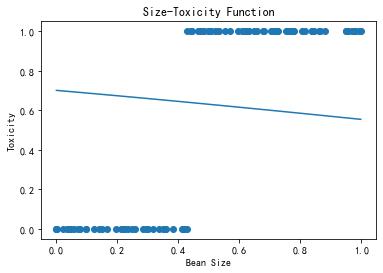

In [8]:
## Create a dataset
n = 100
xs, ys = dataset.get_beans3(n)
plt.title('Size-Toxicity Function', fontsize=12)
plt.xlabel('Bean Size')
plt.ylabel('Toxicity')
plt.scatter(xs, ys)

# randomly initialize the weights
w = np.random.randn(1)
b = np.random.randn(1)

z = w*xs+b
y_pre = 1/(1+np.exp(-z))
plt.plot(xs, y_pre)
plt.show()


In [3]:
# define the function


def sigmoid(x):
    return 1/(1+np.exp(-x))


def f(x):
    return x*w+b


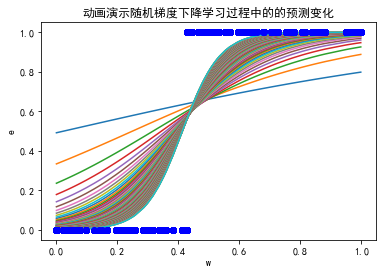

In [26]:
w = np.random.randn(1)
b = np.random.randn(1)
alpha = 0.05

ims = []
fig = plt.figure()
for _ in range(1000):
    for i in range(n):
        x = xs[i]
        y = ys[i]

        # 使用复合函数的链式求导法则，求出代价函数在w和b上的导数
        z = x*w+b
        a = 1/(1+np.exp(-z))
        e = (y-a)**2

        dzdb = 1
        dzdw = x
        dadz = a*(1-a)
        deda = -2*(y-a)

        dedw = deda*dadz*dzdw
        dedb = deda*dadz*dzdb

        # 进行梯度下降，参数调整
        w = w - alpha*dedw
        b = b - alpha*dedb
    if _ % 10 == 0:
        z = w*xs+b
        y_pre = 1/(1+np.exp(-z))
        im = plt.plot(xs, y_pre) + plt.plot(xs, ys, 'o', color="blue")
        plt.title('动画演示随机梯度下降学习过程中的的预测变化')
        plt.xlabel('Bean Size')
        plt.ylabel('Toxicity')
        ims.append(im)

fig.set_facecolor('white')
plt.title('动画演示随机梯度下降学习过程中的的预测变化')
plt.xlabel('w')
plt.ylabel('e')
plt.savefig('./output/05/sigmoid梯度下降.png', dpi=300)


In [25]:
ani = animation.ArtistAnimation(fig, ims, interval=20, repeat_delay=1000)
ani.save("./output/05/sigmoid梯度下降.gif", writer='pillow', dpi=200)


![图片](output/05/sigmoid梯度下降.gif)

<Figure size 432x288 with 0 Axes>

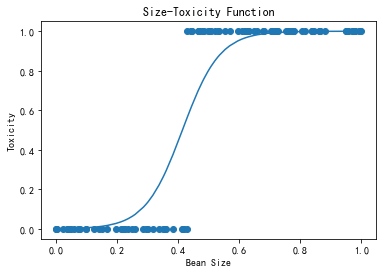

In [46]:
z = w*xs+b
y_pre = 1/(1+np.exp(-z))
plt.clf()
# 设置外部背景色2
fig = plt.figure()
fig.set_facecolor('white')
plt.rcParams['axes.facecolor'] = 'w'
plt.title('Size-Toxicity Function', fontsize=12)
plt.xlabel('Bean Size')
plt.ylabel('Toxicity')
plt.scatter(xs, ys)
plt.plot(xs, y_pre)


plt.savefig("./output/05/sigmoid梯度下降结果.png")
plt.show()
